# Feature Engineering

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [ ]:
# SUBTASK -1

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

---
## 2. Load data

In [7]:
df = pd.read_csv('./clean_eda_data.csv')
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [8]:
df.head(3)

Unnamed: 0                                id  \
0           0  24011ae4ebbe3035111d65fa7c15bc57   
1           1  d29c2c54acc38ff3c0614d0a653813dd   
2           2  764c75f661154dac3a6c254cd082ea7d   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month  \
0  foosdfpfkusacimwkcsosbicdxkicaua         0         54946                0   
1                           MISSING      4660             0                0   
2  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   

  date_activ   date_end date_modif_prod date_renewal  ...  \
0 2013-06-15 2016-06-15      2015-11-01   2015-06-23  ...   
1 2009-08-21 2016-08-30      2009-08-21   2015-08-31  ...   
2 2010-04-16 2016-04-16      2010-04-16   2015-04-17  ...   

   mean_3m_price_off_peak_var  mean_3m_price_peak_var  \
0                    0.131756                0.092638   
1                    0.147600                0.000000   
2                    0.167798                0.088409   

   mean_3m_price_mid_peak_var  mean_3m_price_off_peak_fix  \
0                    0.036909                   42.497907   
1                    0.000000                   44.444710   
2                    0.000000                   44.444710   

   mean_3m_price_peak_fix  mean_3m_price_mid_peak_fix  mean_3m_price_off_peak  \
0               12.218665                    8.145777               42.629663   
1                0.000000                    0.000000               44.592310   
2                0.000000                    0.000000               44.612508   

  mean_3m_price_peak  mean_3m_price_mid_peak  churn  
0          12.311304                8.182687      1  
1           0.000000                0.000000      0  
2           0.088409                0.000000      0  

[3 rows x 54 columns]

---

## 3. Feature engineering

### Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [10]:
price_df = pd.read_csv('price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

id price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745 2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745 2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745 2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745 2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745 2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [12]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]


In [ ]:
# after getting the differnce we will create a new table and then merge it with the original one 

In [13]:
diff.head()

id  offpeak_diff_dec_january_energy  \
0  0002203ffbb812588b632b9e628cc38d                        -0.006192   
1  0004351ebdd665e6ee664792efc4fd13                        -0.004104   
2  0010bcc39e42b3c2131ed2ce55246e3c                         0.050443   
3  0010ee3855fdea87602a5b7aba8e42de                        -0.010018   
4  00114d74e963e47177db89bc70108537                        -0.003994   

   offpeak_diff_dec_january_power  
0                        0.162916  
1                        0.177779  
2                        1.500000  
3                        0.162916  
4                       -0.000001

In [ ]:
# df -OG data
# diff - New data that we created 

In [17]:
df = pd.merge(df, diff, on='id')


In [18]:
df.head()


Unnamed: 0                                id  \
0           0  24011ae4ebbe3035111d65fa7c15bc57   
1           1  d29c2c54acc38ff3c0614d0a653813dd   
2           2  764c75f661154dac3a6c254cd082ea7d   
3           3  bba03439a292a1e166f80264c16191cb   
4           4  149d57cf92fc41cf94415803a877cb4b   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month  \
0  foosdfpfkusacimwkcsosbicdxkicaua         0         54946                0   
1                           MISSING      4660             0                0   
2  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   
3  lmkebamcaaclubfxadlmueccxoimlema      1584             0                0   
4                           MISSING      4425             0              526   

  date_activ   date_end date_modif_prod date_renewal  ...  \
0 2013-06-15 2016-06-15      2015-11-01   2015-06-23  ...   
1 2009-08-21 2016-08-30      2009-08-21   2015-08-31  ...   
2 2010-04-16 2016-04-16      2010-04-16   2015-04-17  ...   
3 2010-03-30 2016-03-30      2010-03-30   2015-03-31  ...   
4 2010-01-13 2016-03-07      2010-01-13   2015-03-09  ...   

   mean_3m_price_peak_fix  mean_3m_price_mid_peak_fix  mean_3m_price_off_peak  \
0               12.218665                    8.145777               42.629663   
1                0.000000                    0.000000               44.592310   
2                0.000000                    0.000000               44.612508   
3                0.000000                    0.000000               44.593296   
4               24.437330                   16.291555               40.848791   

   mean_3m_price_peak  mean_3m_price_mid_peak  churn  \
0           12.311304                8.182687      1   
1            0.000000                0.000000      0   
2            0.088409                0.000000      0   
3            0.000000                0.000000      0   
4           24.539003               16.365274      0   

   offpeak_diff_dec_january_energy_x offpeak_diff_dec_january_power_x  \
0                           0.020057                         3.700961   
1                          -0.003767                         0.177779   
2                          -0.004670                         0.177779   
3                          -0.004547                         0.177779   
4                          -0.006192                         0.162916   

   offpeak_diff_dec_january_energy_y  offpeak_diff_dec_january_power_y  
0                           0.020057                          3.700961  
1                          -0.003767                          0.177779  
2                          -0.004670                          0.177779  
3                          -0.004547                          0.177779  
4                          -0.006192                          0.162916  

[5 rows x 58 columns]

In [ ]:
# according to the results we can see that the average price changes as the time passes,in this case we can try to calculate
#the average price acc to the time rather than calculating yearly,this would help us to get better knowledge 

In [20]:
#Average prices
mean_prices = price_df.groupby(['id']).agg({'price_off_peak_var': 'mean', 'price_peak_var': 'mean', 
                                              'price_mid_peak_var': 'mean', 'price_off_peak_fix': 'mean', 
                                              'price_peak_fix': 'mean', 'price_mid_peak_fix': 'mean'}).reset_index()

In [26]:
# Calculating the mean difference between consecutive periods
mean_prices['opvpv'] = mean_prices['price_off_peak_var'] - mean_prices['price_peak_var']
mean_prices['pvmpv'] = mean_prices['price_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['opvmpv'] = mean_prices['price_off_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['opfpf'] = mean_prices['price_off_peak_fix'] - mean_prices['price_peak_fix']
mean_prices['pfmpf'] = mean_prices['price_peak_fix'] - mean_prices['price_mid_peak_fix']
mean_prices['opfmpf'] = mean_prices['price_off_peak_fix'] - mean_prices['price_mid_peak_fix']

In [27]:
columns = ['id', 'opvpv', 'pvmpv', 'opvmpv', 
           'opfpf', 'pfmpf', 'opfmpf']

df = pd.merge(df, mean_prices[columns], on='id')
df.head()

Unnamed: 0                                id  \
0           0  24011ae4ebbe3035111d65fa7c15bc57   
1           1  d29c2c54acc38ff3c0614d0a653813dd   
2           2  764c75f661154dac3a6c254cd082ea7d   
3           3  bba03439a292a1e166f80264c16191cb   
4           4  149d57cf92fc41cf94415803a877cb4b   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month  \
0  foosdfpfkusacimwkcsosbicdxkicaua         0         54946                0   
1                           MISSING      4660             0                0   
2  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   
3  lmkebamcaaclubfxadlmueccxoimlema      1584             0                0   
4                           MISSING      4425             0              526   

  date_activ   date_end date_modif_prod date_renewal  ...  opvmpv_x  \
0 2013-06-15 2016-06-15      2015-11-01   2015-06-23  ...  0.058257   
1 2009-08-21 2016-08-30      2009-08-21   2015-08-31  ...  0.149609   
2 2010-04-16 2016-04-16      2010-04-16   2015-04-17  ...  0.170512   
3 2010-03-30 2016-03-30      2010-03-30   2015-03-31  ...  0.151210   
4 2010-01-13 2016-03-07      2010-01-13   2015-03-09  ...  0.051309   

     opfpf_x    opfpf_x   opfmpf_x   opvpv_y   pvmpv_y  opvmpv_y    opfpf_y  \
0  18.590255  18.590255  26.040925  0.024038  0.034219  0.058257  18.590255   
1  44.311375  44.311375  44.311375  0.142485  0.007124  0.149609  44.311375   
2  44.385450  44.385450  44.385450  0.082090  0.088421  0.170512  44.385450   
3  44.400265  44.400265  44.400265  0.151210  0.000000  0.151210  44.400265   
4  16.275263  16.275263  24.412893  0.020536  0.030773  0.051309  16.275263   

      pfmpf   opfmpf_y  
0  7.450670  26.040925  
1  0.000000  44.311375  
2  0.000000  44.385450  
3  0.000000  44.400265  
4  8.137629  24.412893  

[5 rows x 70 columns]

In [ ]:
# as we can see that calculating the average of a certain time periods helps us to enhance the already mentioned functionality
# futuher we can try calculating the same for months and reveal the pattern between them 

In [28]:
mean_prices_by_month = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 
                                                                     'price_peak_var': 'mean', 
                                                                     'price_mid_peak_var': 'mean', 
                                                                     'price_off_peak_fix': 'mean', 
                                                                     'price_peak_fix': 'mean', 
                                                                     'price_mid_peak_fix': 'mean'}).reset_index()

In [32]:
# Calculate the mean difference between consecutive periods
mean_prices_by_month['opvpv'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_peak_var']
mean_prices_by_month['pvmpv'] = mean_prices_by_month['price_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['opvmpv'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['opfpf'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_peak_fix']
mean_prices_by_month['pfmpf'] = mean_prices_by_month['price_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']
mean_prices_by_month['opfmpf'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']

In [ ]:
columns = ['id', 'opvpv', 'pvmpv', 'opvmpv', 
           'opfpf', 'pfmpf', 'opfmpf']

In [33]:
max_diff_across_periods_months = mean_prices_by_month.groupby(['id']).agg({
    'opvpv': 'max',
    'pvmpv': 'max',
    'opvmpv': 'max',
    'opfpf': 'max',
    'pfmpf': 'max',
    'opfmpf': 'max'
}).reset_index().rename(
    columns={
        'opvpv': 'opvpv_max_monthly_diff',
        'pvmpv': 'pvmpv_max_monthly_diff',
        'opvmpv': 'opvmpv_max_monthly_diff',
        'opfpf': 'opfpf_max_monthly_diff',
        'pfmpf': 'pfmpf_max_monthly_diff',
        'opfmpf': 'opfmpf_max_monthly_diff'
    }
)

In [34]:
columns = ['id', 'opvpv_max_monthly_diff', 'pvmpv_max_monthly_diff', 
           'opvmpv_max_monthly_diff', 'opfpf_max_monthly_diff', 
           'pfmpf_max_monthly_diff', 'opfmpf_max_monthly_diff']

df= pd.merge(df, max_diff_across_periods_months[columns], on='id')
df.head()

Unnamed: 0                                id  \
0           0  24011ae4ebbe3035111d65fa7c15bc57   
1           1  d29c2c54acc38ff3c0614d0a653813dd   
2           2  764c75f661154dac3a6c254cd082ea7d   
3           3  bba03439a292a1e166f80264c16191cb   
4           4  149d57cf92fc41cf94415803a877cb4b   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month  \
0  foosdfpfkusacimwkcsosbicdxkicaua         0         54946                0   
1                           MISSING      4660             0                0   
2  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   
3  lmkebamcaaclubfxadlmueccxoimlema      1584             0                0   
4                           MISSING      4425             0              526   

  date_activ   date_end date_modif_prod date_renewal  ...  opvmpv_y  \
0 2013-06-15 2016-06-15      2015-11-01   2015-06-23  ...  0.058257   
1 2009-08-21 2016-08-30      2009-08-21   2015-08-31  ...  0.149609   
2 2010-04-16 2016-04-16      2010-04-16   2015-04-17  ...  0.170512   
3 2010-03-30 2016-03-30      2010-03-30   2015-03-31  ...  0.151210   
4 2010-01-13 2016-03-07      2010-01-13   2015-03-09  ...  0.051309   

     opfpf_y     pfmpf   opfmpf_y  opvpv_max_monthly_diff  \
0  18.590255  7.450670  26.040925                0.060550   
1  44.311375  0.000000  44.311375                0.151367   
2  44.385450  0.000000  44.385450                0.084587   
3  44.400265  0.000000  44.400265                0.153133   
4  16.275263  8.137629  24.412893                0.022225   

   pvmpv_max_monthly_diff  opvmpv_max_monthly_diff opfpf_max_monthly_diff  \
0                0.085483                 0.146033              44.266930   
1                0.085483                 0.151367              44.444710   
2                0.089162                 0.172468              44.444710   
3                0.000000                 0.153133              44.444710   
4                0.033743                 0.055866              16.291555   

   pfmpf_max_monthly_diff  opfmpf_max_monthly_diff  
0                8.145775                 44.26693  
1                0.000000                 44.44471  
2                0.000000                 44.44471  
3                0.000000                 44.44471  
4                8.145775                 24.43733  

[5 rows x 76 columns]

Nothing irritates me more as a utility customer than unexpected price changes between months, and a significant price increase within a short period of time would prompt me to shop around for a better deal with other utilities providers

In [ ]:
# As we can see that there is significant price increase within a short period of time and unexpected price changes
# between months

In [ ]:
# let's calculate tenure in order to get deep understanding about the data 

In [38]:
df['tenure'] = ((df['date_end'] - df['date_activ'])/ np.timedelta64(1, 'Y')).astype(int)


In [39]:
df.groupby(['tenure']).agg({'churn': 'mean'}).sort_values(by='churn', ascending=False)


churn
tenure          
3       0.143836
2       0.133080
4       0.125756
13      0.095238
5       0.085425
12      0.083333
6       0.080713
7       0.073394
11      0.063584
8       0.048000
9       0.024096
10      0.020000

In [ ]:
# acc to the result, we can conclude that the clients who have been with us more than 4 months do not churn and the 
# ones less then that churn more often, this can be an interesting feature

Transforming dates into months
 months_active = Number of months active until reference date (Jan 2016)
 months_to_end = Number of months of the contract left until reference date (Jan 2016)
 months_modif_prod = Number of months since last modification until reference date (Jan 2016)
 months_renewal = Number of months since last renewal until reference date (Jan 2016)

In [45]:
def convert_months(reference_date, df, column):
    """
    Input a column with timedeltas and return months
    """
    time_delta = reference_date - df[column]
    months = (time_delta / np.timedelta64(1, 'M')).astype(int)
    return months

In [46]:
# Create reference date
reference_date = datetime(2016, 1, 1)

# Create columns
df['months_active'] = convert_months(reference_date, df, 'date_active')
df['months_to_end'] = -convert_months(reference_date, df, 'date_end')
df['months_modif_prod'] = convert_months(reference_date, df, 'date_modif_prod')
df['months_renewal'] = convert_months(reference_date, df, 'date_renewal')

INSIGHTS:
1- Acc to me 'months_active' this column would help us to be updated which client is been the longer with the company and help us to know the 'months' in which the clients churn 

2- The "months_to_end" feature provides valuable information for PowerCo in understanding customer behavior and churn patterns. By analyzing the number of months remaining in a customer's contract, PowerCo can identify customers approaching the end of their contracts and target them with retention strategies or attractive renewal offers. It also helps in understanding churn patterns based on contract duration, distinguishing between customers who have recently joined, those in the middle of their contracts, and those nearing contract completion. This knowledge enables PowerCo to tailor their approach to customer retention, offering incentives, exceptional service, or addressing concerns promptly to increase customer loyalty and satisfaction.

3- The "months_modif_prod" feature indicates the level of customer engagement and satisfaction with PowerCo. Customers who have recently made updates or modifications to their contracts demonstrate their proactive involvement and positive experiences with the company. This feature can help identify engaged customers, target cross-selling or upselling opportunities, and potentially reduce churn rates.

4- The "months_renewal" feature reflects the degree of customer engagement, commitment, and loyalty. It measures the number of months since a client last renewed their contract, providing insights into their ongoing commitment to PowerCo. This feature helps identify loyal customers.


In [47]:
# since  we have converted date into months, we no longer need them
remove = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']

df = df.drop(columns=remove)
df.head()

Unnamed: 0                                id  \
0           0  24011ae4ebbe3035111d65fa7c15bc57   
1           1  d29c2c54acc38ff3c0614d0a653813dd   
2           2  764c75f661154dac3a6c254cd082ea7d   
3           3  bba03439a292a1e166f80264c16191cb   
4           4  149d57cf92fc41cf94415803a877cb4b   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month  \
0  foosdfpfkusacimwkcsosbicdxkicaua         0         54946                0   
1                           MISSING      4660             0                0   
2  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   
3  lmkebamcaaclubfxadlmueccxoimlema      1584             0                0   
4                           MISSING      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  ...  pvmpv_max_monthly_diff  \
0                     1.78  ...                0.085483   
1                    16.27  ...                0.085483   
2                    38.72  ...                0.089162   
3                    19.83  ...                0.000000   
4                   131.73  ...                0.033743   

   opvmpv_max_monthly_diff  opfpf_max_monthly_diff pfmpf_max_monthly_diff  \
0                 0.146033               44.266930               8.145775   
1                 0.151367               44.444710               0.000000   
2                 0.172468               44.444710               0.000000   
3                 0.153133               44.444710               0.000000   
4                 0.055866               16.291555               8.145775   

   opfmpf_max_monthly_diff  tenure  months_activ  months_to_end  \
0                 44.26693       3            30              5   
1                 44.44471       7            76              7   
2                 44.44471       6            68              3   
3                 44.44471       6            69              2   
4                 24.43733       6            71              2   

   months_modif_prod  months_renewal  
0                  2               6  
1                 76               4  
2                 68               8  
3                 69               9  
4                 71               9  

[5 rows x 77 columns]

In [48]:
# replace T with 1 and F with 0
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [49]:
df['has_gas'] = encoder.fit_transform(df['has_gas'])
df.head()

Unnamed: 0                                id  \
0           0  24011ae4ebbe3035111d65fa7c15bc57   
1           1  d29c2c54acc38ff3c0614d0a653813dd   
2           2  764c75f661154dac3a6c254cd082ea7d   
3           3  bba03439a292a1e166f80264c16191cb   
4           4  149d57cf92fc41cf94415803a877cb4b   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month  \
0  foosdfpfkusacimwkcsosbicdxkicaua         0         54946                0   
1                           MISSING      4660             0                0   
2  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   
3  lmkebamcaaclubfxadlmueccxoimlema      1584             0                0   
4                           MISSING      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  ...  pvmpv_max_monthly_diff  \
0                     1.78  ...                0.085483   
1                    16.27  ...                0.085483   
2                    38.72  ...                0.089162   
3                    19.83  ...                0.000000   
4                   131.73  ...                0.033743   

   opvmpv_max_monthly_diff  opfpf_max_monthly_diff  pfmpf_max_monthly_diff  \
0                 0.146033               44.266930                8.145775   
1                 0.151367               44.444710                0.000000   
2                 0.172468               44.444710                0.000000   
3                 0.153133               44.444710                0.000000   
4                 0.055866               16.291555                8.145775   

   opfmpf_max_monthly_diff  tenure  months_activ  months_to_end  \
0                 44.26693       3            30              5   
1                 44.44471       7            76              7   
2                 44.44471       6            68              3   
3                 44.44471       6            69              2   
4                 24.43733       6            71              2   

   months_modif_prod  months_renewal  
0                  2               6  
1                 76               4  
2                 68               8  
3                 69               9  
4                 71               9  

[5 rows x 77 columns]

In [51]:
df.groupby(['has_gas']).agg({'churn': 'mean'})

churn
has_gas          
0        0.100544
1        0.081887

Customers who purchase both electricity and gas from PowerCo are more likely to stay loyal to the brand and less likely to switch providers compared to customers who only purchase electricity. This suggests that offering gas services alongside electricity helps in retaining customers and building brand loyalty. By analyzing the churn rates, PowerCo can see the positive impact of providing bundled services and can focus on promoting the benefits of purchasing both utilities from them. This reinforces the importance of offering diverse services to keep customers satisfied and engaged.

In [ ]:
#channel_sales

In [53]:
# Transform into categorical type
df['channel_sales'] = df['channel_sales'].astype('category')

# categories are within columns
df['channel_sales'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    6753
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

In [ ]:
# Acc to the output above we can see than there are 8 categories in which we can divide,but if we look at the last 3 
# which almost doesn't provide us much details so we can remove them 

In [56]:
df = pd.get_dummies(df, columns=['channel_sales'], prefix='channel')
df = df.drop(columns=['channel_sddiedcslfslkckwlfkdpoeeailfpeds', 
                                  'channel_epumfxlbckeskwekxbiuasklxalciiuu', 
                                  'channel_fixdbufsefwooaasfcxdxadsiekoceaa'])
df.head()

Unnamed: 0                                id  cons_12m  cons_gas_12m  \
0           0  24011ae4ebbe3035111d65fa7c15bc57         0         54946   
1           1  d29c2c54acc38ff3c0614d0a653813dd      4660             0   
2           2  764c75f661154dac3a6c254cd082ea7d       544             0   
3           3  bba03439a292a1e166f80264c16191cb      1584             0   
4           4  149d57cf92fc41cf94415803a877cb4b      4425             0   

   cons_last_month  forecast_cons_12m  forecast_cons_year  \
0                0               0.00                   0   
1                0             189.95                   0   
2                0              47.96                   0   
3                0             240.04                   0   
4              526             445.75                 526   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                     1.78   
1                       0.0                    16.27   
2                       0.0                    38.72   
3                       0.0                    19.83   
4                       0.0                   131.73   

   forecast_price_energy_off_peak  ...  tenure  months_activ  months_to_end  \
0                        0.114481  ...       3            30              5   
1                        0.145711  ...       7            76              7   
2                        0.165794  ...       6            68              3   
3                        0.146694  ...       6            69              2   
4                        0.116900  ...       6            71              2   

   months_modif_prod  months_renewal  channel_MISSING  \
0                  2               6                0   
1                 76               4                1   
2                 68               8                0   
3                 69               9                0   
4                 71               9                1   

   channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         0   
2                                         1   
3                                         0   
4                                         0   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                         0   
1                                         0   
2                                         0   
3                                         1   
4                                         0   

  channel_usilxuppasemubllopkaafesmlibmsdf  
0                                        0  
1                                        0  
2                                        0  
3                                        0  
4                                        0  

[5 rows x 81 columns]

In [ ]:
# As we have seen there are several skewed variabes in the previous task , we need to handle them correctly.

In [62]:
skewed = [
    'cons_12m', 
    'cons_gas_12m', 
    'cons_last_month',
    'forecast_cons_12m', 
    'forecast_cons_year', 
    'forecast_discount_energy',
    'forecast_meter_rent_12m', 
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak', 
    'forecast_price_pow_off_peak'
]
df[skewed].describe().T

count           mean            std  min  \
cons_12m                        14605.0  159230.267032  573483.629064  0.0   
cons_gas_12m                    14605.0   28091.082506  162978.563803  0.0   
cons_last_month                 14605.0   16091.371448   64366.262314  0.0   
forecast_cons_12m               14605.0    1868.638618    2387.651549  0.0   
forecast_cons_year              14605.0    1399.858747    3247.876793  0.0   
forecast_discount_energy        14605.0       0.966450       5.108355  0.0   
forecast_meter_rent_12m         14605.0      63.090448      66.166636  0.0   
forecast_price_energy_off_peak  14605.0       0.137282       0.024623  0.0   
forecast_price_energy_peak      14605.0       0.050488       0.049037  0.0   
forecast_price_pow_off_peak     14605.0      43.130085       4.486140  0.0   

                                        25%           50%           75%  \
cons_12m                        5674.000000  14116.000000  40764.000000   
cons_gas_12m                       0.000000      0.000000      0.000000   
cons_last_month                    0.000000    793.000000   3383.000000   
forecast_cons_12m                494.980000   1112.610000   2402.270000   
forecast_cons_year                 0.000000    314.000000   1746.000000   
forecast_discount_energy           0.000000      0.000000      0.000000   
forecast_meter_rent_12m           16.180000     18.800000    131.030000   
forecast_price_energy_off_peak     0.116340      0.143166      0.146348   
forecast_price_energy_peak         0.000000      0.084138      0.098837   
forecast_price_pow_off_peak       40.606701     44.311378     44.311378   

                                         max  
cons_12m                        6.207104e+06  
cons_gas_12m                    4.154590e+06  
cons_last_month                 7.712030e+05  
forecast_cons_12m               8.290283e+04  
forecast_cons_year              1.753750e+05  
forecast_discount_energy        3.000000e+01  
forecast_meter_rent_12m         5.993100e+02  
forecast_price_energy_off_peak  2.739630e-01  
forecast_price_energy_peak      1.959750e-01  
forecast_price_pow_off_peak     5.926638e+01

In [ ]:
# insights: standard deviation is quite high 

In [64]:
#Applying log10 transformation

df["cons_12m"] = np.log10(df["cons_12m"] + 1)
df["cons_gas_12m"] = np.log10(df["cons_gas_12m"] + 1)
df["cons_last_month"] = np.log10(df["cons_last_month"] + 1)
df["forecast_cons_12m"] = np.log10(df["forecast_cons_12m"] + 1)
df["forecast_cons_year"] = np.log10(df["forecast_cons_year"] + 1)
df["forecast_meter_rent_12m"] = np.log10(df["forecast_meter_rent_12m"] + 1)
df["imp_cons"] = np.log10(df["imp_cons"] + 1)

In [65]:
# rechecking 
df[skewed].describe().T

count       mean       std  min        25%  \
cons_12m                        14605.0   0.710011  0.092442  0.0   0.677056   
cons_gas_12m                    14605.0   0.129006  0.278673  0.0   0.000000   
cons_last_month                 14605.0   0.421021  0.310790  0.0   0.000000   
forecast_cons_12m               14605.0   0.587675  0.108450  0.0   0.567669   
forecast_cons_year              14605.0   0.350728  0.303840  0.0   0.000000   
forecast_discount_energy        14605.0   0.966450  5.108355  0.0   0.000000   
forecast_meter_rent_12m         14605.0   0.387016  0.117628  0.0   0.349282   
forecast_price_energy_off_peak  14605.0   0.137282  0.024623  0.0   0.116340   
forecast_price_energy_peak      14605.0   0.050488  0.049037  0.0   0.000000   
forecast_price_pow_off_peak     14605.0  43.130085  4.486140  0.0  40.606701   

                                      50%        75%        max  
cons_12m                         0.711786   0.748985   0.891698  
cons_gas_12m                     0.000000   0.000000   0.881871  
cons_last_month                  0.591045   0.656044   0.838041  
forecast_cons_12m                0.607105   0.641554   0.772217  
forecast_cons_year               0.543858   0.627601   0.795461  
forecast_discount_energy         0.000000   0.000000  30.000000  
forecast_meter_rent_12m          0.361098   0.494248   0.577305  
forecast_price_energy_off_peak   0.143166   0.146348   0.273963  
forecast_price_energy_peak       0.084138   0.098837   0.195975  
forecast_price_pow_off_peak     44.311378  44.311378  59.266378

In [ ]:
# now the standard deviatioins seem to be good!
# let us check them with the helpl of some plots

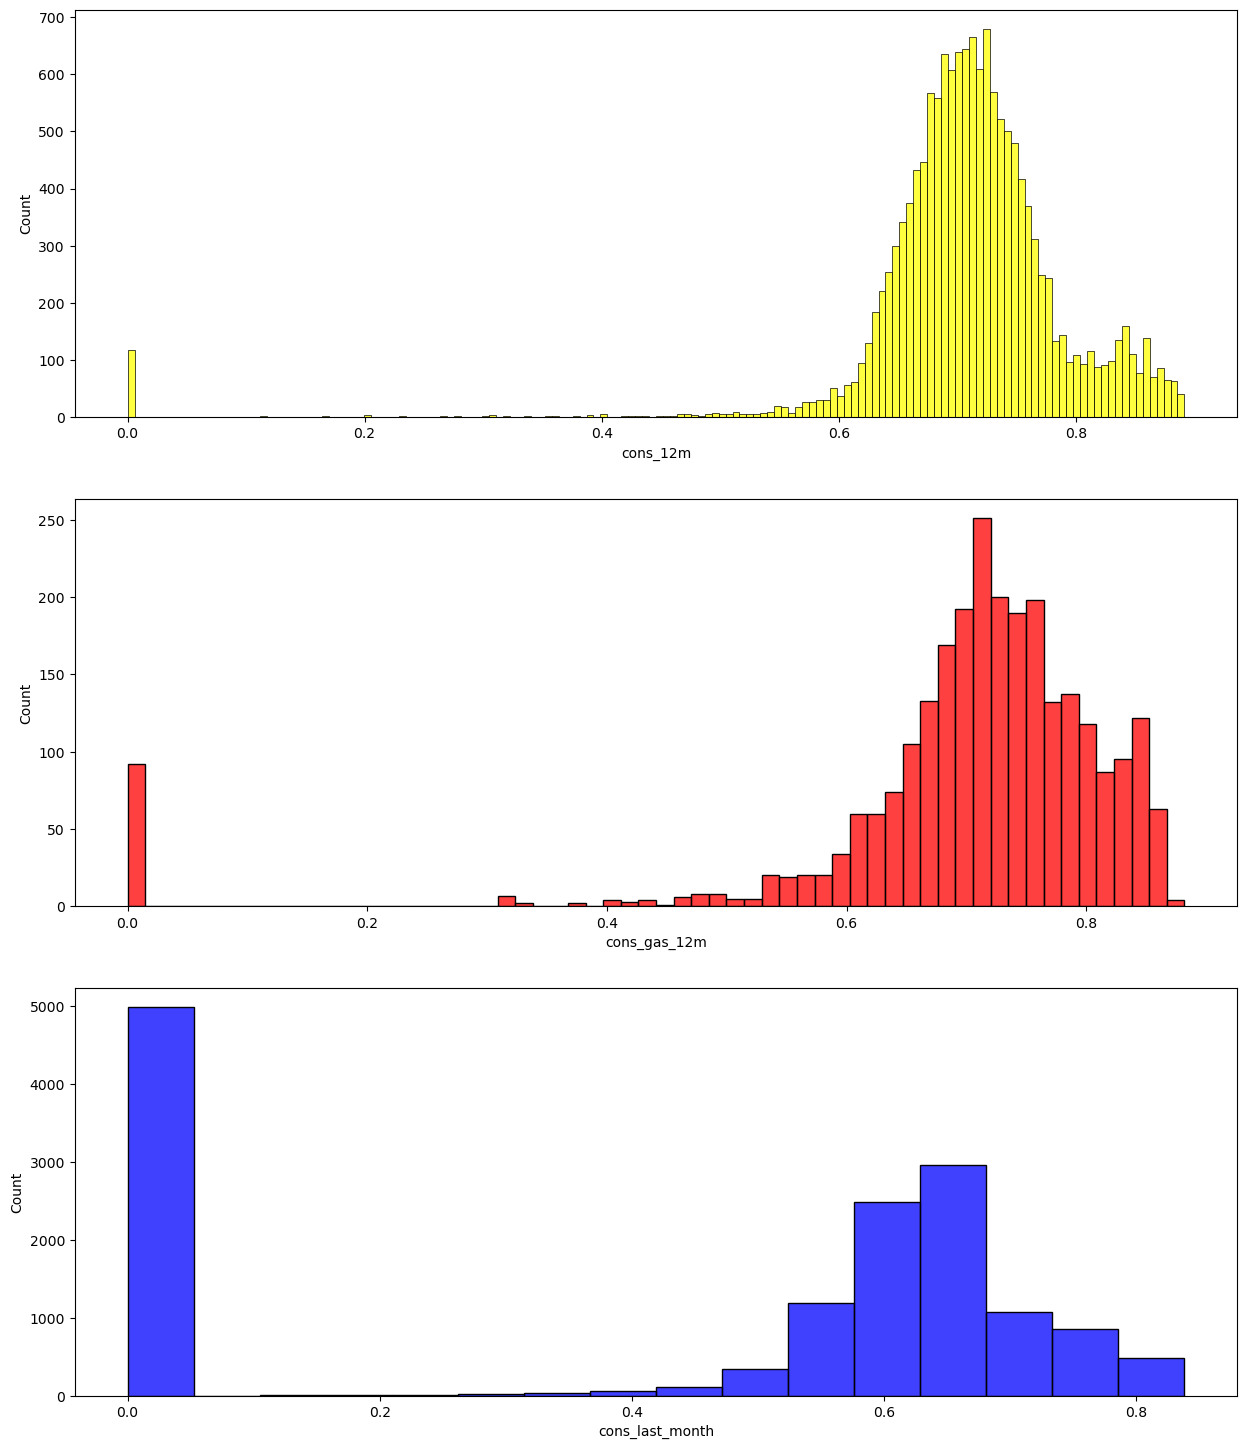

In [68]:
fig, axs = plt.subplots(nrows=3, figsize=(15, 18))
sns.histplot((df["cons_12m"].dropna()), ax=axs[0], color='yellow')
sns.histplot((df[df["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1], color='red')
sns.histplot((df["cons_last_month"].dropna()), ax=axs[2], color='blue')

plt.show()

Analyzing the correlation between features in a dataset is an important step in understanding the relationships and dependencies among variables. High correlation between features indicates a linear relationship, which can be useful for predicting churn. However, excessively high correlation between features may suggest redundancy or shared information.

It is ideal to have features that are highly correlated with the target variable (churn) but have low correlation with each other. This ensures that each feature provides unique and independent information for predicting churn. However, finding a set of features with zero correlation among themselves and high correlation with the target variable is rare in practice.

By examining the correlation matrix of the features, we can identify any significant correlations. This information helps in feature selection and identifying potentially redundant or highly influential features. It also guides further feature engineering efforts to enhance the predictive power of the model.

Understanding the correlation between features allows us to make informed decisions about which features to include, exclude, or transform to improve the model's performance in predicting churn.

In [70]:
correlation = df.corr()




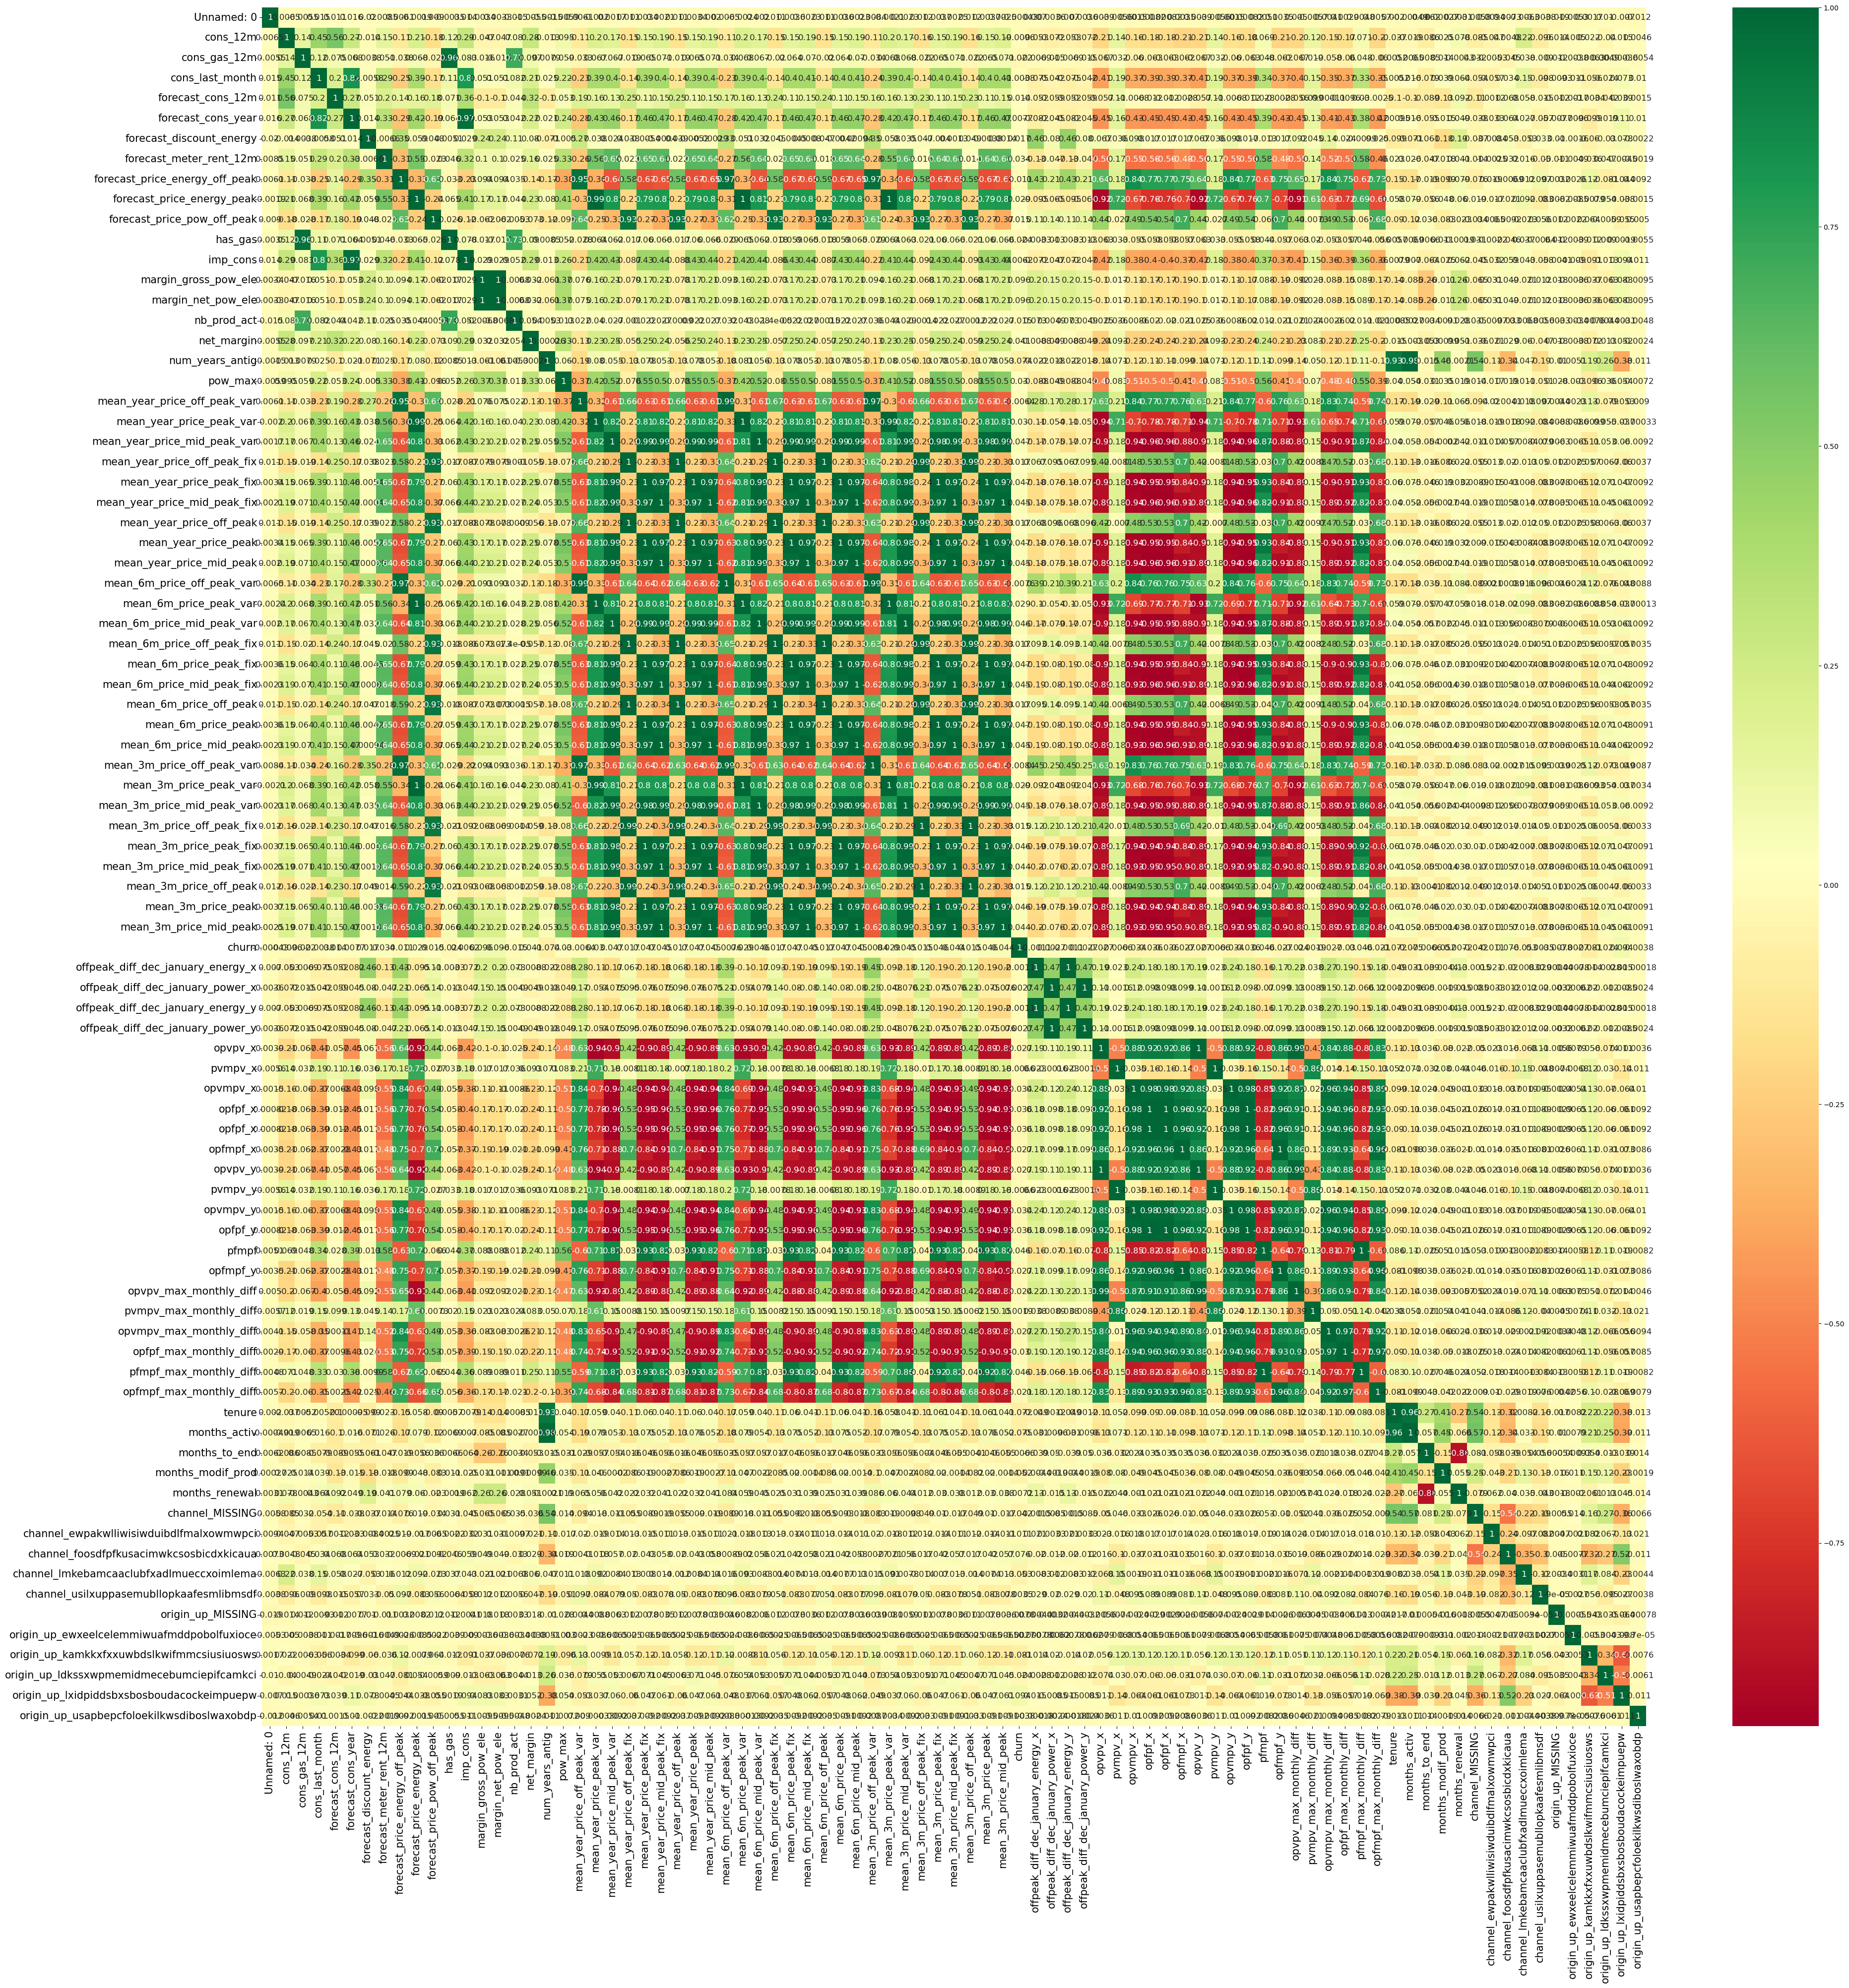

In [75]:
plt.figure(figsize=(45, 45))
sns.heatmap(
    correlation, 
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values, 
    annot=True, 
    annot_kws={'size': 12}, 
    cmap='RdYlGn'
)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

removal of two variables(num_years_antig and forecast_cons_year) which exhibit a high correlation with other independent features will be better.

In [73]:
df = df.drop(columns=['num_years_antig', 'forecast_cons_year'])
df.head()

Unnamed: 0                                id  cons_12m  cons_gas_12m  \
0           0  24011ae4ebbe3035111d65fa7c15bc57  0.000000      0.758908   
1           1  d29c2c54acc38ff3c0614d0a653813dd  0.669175      0.000000   
2           2  764c75f661154dac3a6c254cd082ea7d  0.572453      0.000000   
3           3  bba03439a292a1e166f80264c16191cb  0.623252      0.000000   
4           4  149d57cf92fc41cf94415803a877cb4b  0.667080      0.000000   

   cons_last_month  forecast_cons_12m  forecast_discount_energy  \
0         0.000000           0.000000                       0.0   
1         0.000000           0.515996                       0.0   
2         0.000000           0.429727                       0.0   
3         0.000000           0.529185                       0.0   
4         0.570754           0.562301                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                 0.159581                        0.114481   
1                 0.349723                        0.145711   
2                 0.414808                        0.165794   
3                 0.365243                        0.146694   
4                 0.494568                        0.116900   

   forecast_price_energy_peak  ...  channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                    0.098142  ...                                         0   
1                    0.000000  ...                                         0   
2                    0.087899  ...                                         0   
3                    0.000000  ...                                         0   
4                    0.100015  ...                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         0   
2                                         1   
3                                         0   
4                                         0   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                         0   
1                                         0   
2                                         0   
3                                         1   
4                                         0   

   channel_usilxuppasemubllopkaafesmlibmsdf  origin_up_MISSING  \
0                                         0                  0   
1                                         0                  0   
2                                         0                  0   
3                                         0                  0   
4                                         0                  0   

   origin_up_ewxeelcelemmiwuafmddpobolfuxioce  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                           0   
1                                           1   
2                                           1   
3                                           1   
4                                           1   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  \
0                                           1   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_usapbepcfoloekilkwsdiboslwaxobdp  
0                                           0  
1                                           0  
2       

In [ ]:
# SUBTASK -2

Random Forest for model prediction

Random Forest classifier is like a team of decision-making trees. Instead of relying on just one tree to make predictions, we have a whole forest of trees working together.

Each decision tree learns patterns from a different part of the data, just like if we asked many people to learn how to code, each person would have their own style and approach. These decision trees are called weak learners because they may not be perfect on their own, but together they create a powerful pool of knowledge.

Instead of depending on a single decision tree's prediction, the Random Forest combines the predictions of all the trees in the forest. Some ensemble algorithms use voting to decide the final prediction, while others use averaging.

By increasing the number of trees in the forest, we aim to get the best possible prediction. This is because the forest benefits from the collective wisdom of many trees, each capturing different patterns in the data.

The Random Forest has advantages such as not needing feature scaling and being good at handling complex relationships between variables. However, training a Random Forest can be computationally intensive and time-consuming due to the large number of trees.

Overall, the Random Forest classifier is a powerful algorithm that leverages the strength of multiple decision trees to make accurate predictions.

In [ ]:
# Let us start with Data Sampling where we will start by diving our data into certain parts such as testing and training 
# the data. In our data we will split 75% for training and 25% for testing. 

In [ ]:
# Before starting it's always a best practice to make a copy of the data.

In [77]:
train_df = df.copy()


In [78]:
# Separate target variable from independent variables
X = df.drop(columns=['id', 'churn'])
y = df['churn']

In [80]:
X

Unnamed: 0  cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0               0  0.000000      0.758908         0.000000           0.000000   
1               1  0.669175      0.000000         0.000000           0.515996   
2               2  0.572453      0.000000         0.000000           0.429727   
3               3  0.623252      0.000000         0.000000           0.529185   
4               4  0.667080      0.000000         0.570754           0.562301   
...           ...       ...           ...              ...                ...   
14600       14600  0.741058      0.754402         0.000000           0.669071   
14601       14601  0.686527      0.000000         0.513227           0.579920   
14602       14602  0.630020      0.000000         0.512587           0.516128   
14603       14603  0.494234      0.000000         0.000000           0.363302   
14604       14604  0.693820      0.000000         0.000000           0.589140   

       forecast_discount_energy  forecast_meter_rent_12m  \
0                           0.0                 0.159581   
1                           0.0                 0.349723   
2                           0.0                 0.414808   
3                           0.0                 0.365243   
4                           0.0                 0.494568   
...                         ...                      ...   
14600                       0.0                 0.360137   
14601                       0.0                 0.499887   
14602                       0.0                 0.493590   
14603                       0.0                 0.281659   
14604                       0.0                 0.119246   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                            0.114481                    0.098142   
1                            0.145711                    0.000000   
2                            0.165794                    0.087899   
3                            0.146694                    0.000000   
4                            0.116900                    0.100015   
...                               ...                         ...   
14600                        0.138305                    0.000000   
14601                        0.100167                    0.091892   
14602                        0.116900                    0.100015   
14603                        0.145711                    0.000000   
14604                        0.167086                    0.088454   

       forecast_price_pow_off_peak  ...  \
0                        40.606701  ...   
1                        44.311378  ...   
2                        44.311378  ...   
3                        44.311378  ...   
4                        40.606701  ...   
...                            ...  ...   
14600                    44.311378  ...   
14601                    58.995952  ...   
14602                    40.606701  ...   
14603                    44.311378  ...   
14604                    45.311378  ...   

       channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   
...                                         ...   
14600                                         0   
14601                                         0   
14602                                         0   
14603                                         0   
14604                                         0   

       channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                             1   
1                                             0   
2                                             1   
3                                             0   
4                                             0   
...                                         ... 

In [82]:
y


0        1
1        0
2        0
3        0
4        0
        ..
14600    0
14601    1
14602    1
14603    0
14604    0
Name: churn, Length: 14605, dtype: int64

In [87]:
# 75% - training and 25% - test data

In [83]:
print(X.shape)
print(y.shape)

(14605, 82)
(14605,)


In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [85]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10953, 82)
(10953,)
(3652, 82)
(3652,)


In [88]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 0)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0)

In [ ]:
#  n_estimators = 1000 == 1000 decision trees

In [89]:
## prediction of test data
y_pred = rf_classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

When evaluating a trained model's performance, it's important to go beyond simple accuracy and consider additional metrics that provide a more detailed and comprehensive assessment. Let's take a closer look at each of the metrics:

Accuracy: Accuracy measures the ratio of correctly predicted observations to the total number of observations. While it provides an overall measure of correctness, it can be misleading in cases where the class distribution is imbalanced or the cost of misclassification differs between classes. It's crucial to consider other metrics alongside accuracy.

Precision: Precision focuses on the ability of the classifier to avoid labeling negative samples as positive. It measures the proportion of correctly identified positive cases among all positive predictions. Precision is particularly important when the cost or impact of false positives is high. For example, in medical diagnostics, precision helps assess the rate of correctly identified cases among those predicted to have a certain condition.

Recall (Sensitivity): Recall evaluates the ability of the classifier to find all positive samples. It measures the proportion of correctly identified positive cases among all actual positive cases. Recall is important when the cost or impact of false negatives is high. For example, in medical screening tests, recall helps assess the ability of the model to capture all instances of a particular disease.

ROC & AUC: Receiver Operating Characteristic (ROC) is a graphical representation of the classifier's performance by plotting the true positive rate (sensitivity) against the false positive rate (1 - specificity) at various thresholds. The Area Under the ROC Curve (AUC) summarizes the classifier's performance in distinguishing between classes. A higher AUC value indicates a better discriminative ability of the model, where an AUC of 1 represents a perfect classifier.

K-Fold Cross Validation: Cross-validation is a technique used to assess how well the model generalizes to independent data. K-Fold Cross Validation divides the data into K subsets (folds) and iteratively trains and evaluates the model on different combinations of these folds. It provides a more robust estimate of model performance, reducing the impact of data variability and overfitting.

Using these metrics together provides a more comprehensive evaluation of the model's performance in classification tasks. Accuracy gives an overall measure, while precision and recall focus on specific aspects of classification errors. ROC & AUC provide insights into the model's ability to differentiate between classes, and K-Fold Cross Validation helps assess its generalization capability. Considering these metrics helps gain a deeper understanding of the model's strengths and limitations.

In [90]:
# Importing Model Evaluation Metrics

In [91]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report


In [92]:
# Model Accuracy Score

In [94]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score= ", accuracy)
print(classification_report(y_test, y_pred))


Accuracy score=  0.9019715224534501
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3279
           1       0.94      0.04      0.08       373

    accuracy                           0.90      3652
   macro avg       0.92      0.52      0.52      3652
weighted avg       0.91      0.90      0.86      3652



In [ ]:
# Confusion Matrix

[[3278    1]
 [ 357   16]]


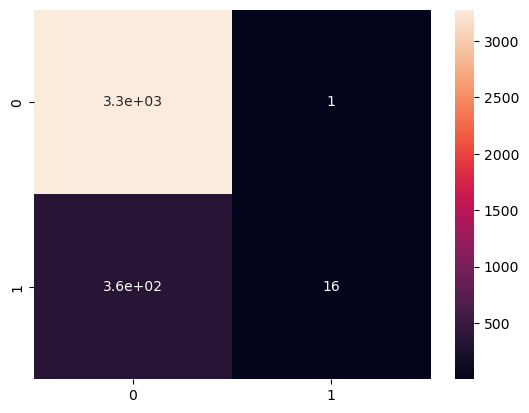

In [95]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

sns.heatmap(cm, annot=True)
plt.show()

In [ ]:
# Precision

In [96]:
print("Precision Score = ", precision_score(y_test, y_pred))


Precision Score =  0.9411764705882353


In [ ]:
# Recall

In [98]:
print("Recall Score =  ", recall_score(y_test, y_pred))


Recall Score =   0.04289544235924933


In [ ]:
# F1 score

In [99]:
print("F1 Score is =", f1_score(y_test, y_pred))


F1 Score is = 0.08205128205128205


In [ ]:
# K-Fold Cross Validation

In [100]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(cv_scores))

Cross-validation scores:[0.90643542 0.91236878 0.90963031 0.90639269 0.90684932]


In [ ]:
 # We can summarize the cross-validation accuracy by calculating its mean.

In [101]:
print('Average cross-validation score: {:.4f}'.format(cv_scores.mean()))

Average cross-validation score: 0.9083


# INSIGHTS

In [104]:
# Accuracy score=  0.9019715224534501
# Precision Score =  0.9411764705882353
# Recall Score =   0.04289544235924933
# F1 Score is = 0.08205128205128205
# Cross-validation scores:[0.90643542 0.91236878 0.90963031 0.90639269 0.90684932]

Examining feature importances is a valuable approach to understand the findings of a model, especially when using the Random Forest classifier. Feature importances provide insights into the importance of each feature in the prediction model.

In a Random Forest scenario, the feature importance is determined by calculating the number of times each feature is used for splitting across all the decision trees in the forest. Features that are frequently used for splitting tend to have higher importances because they contribute more to the overall predictive power of the model.

By examining the feature importances, you can identify the most influential features that contribute significantly to the model's predictions. This information helps in feature selection, identifying key factors driving the predictions, and gaining insights into the underlying relationships between features and the target variable.

In [105]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': rf_classifier.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

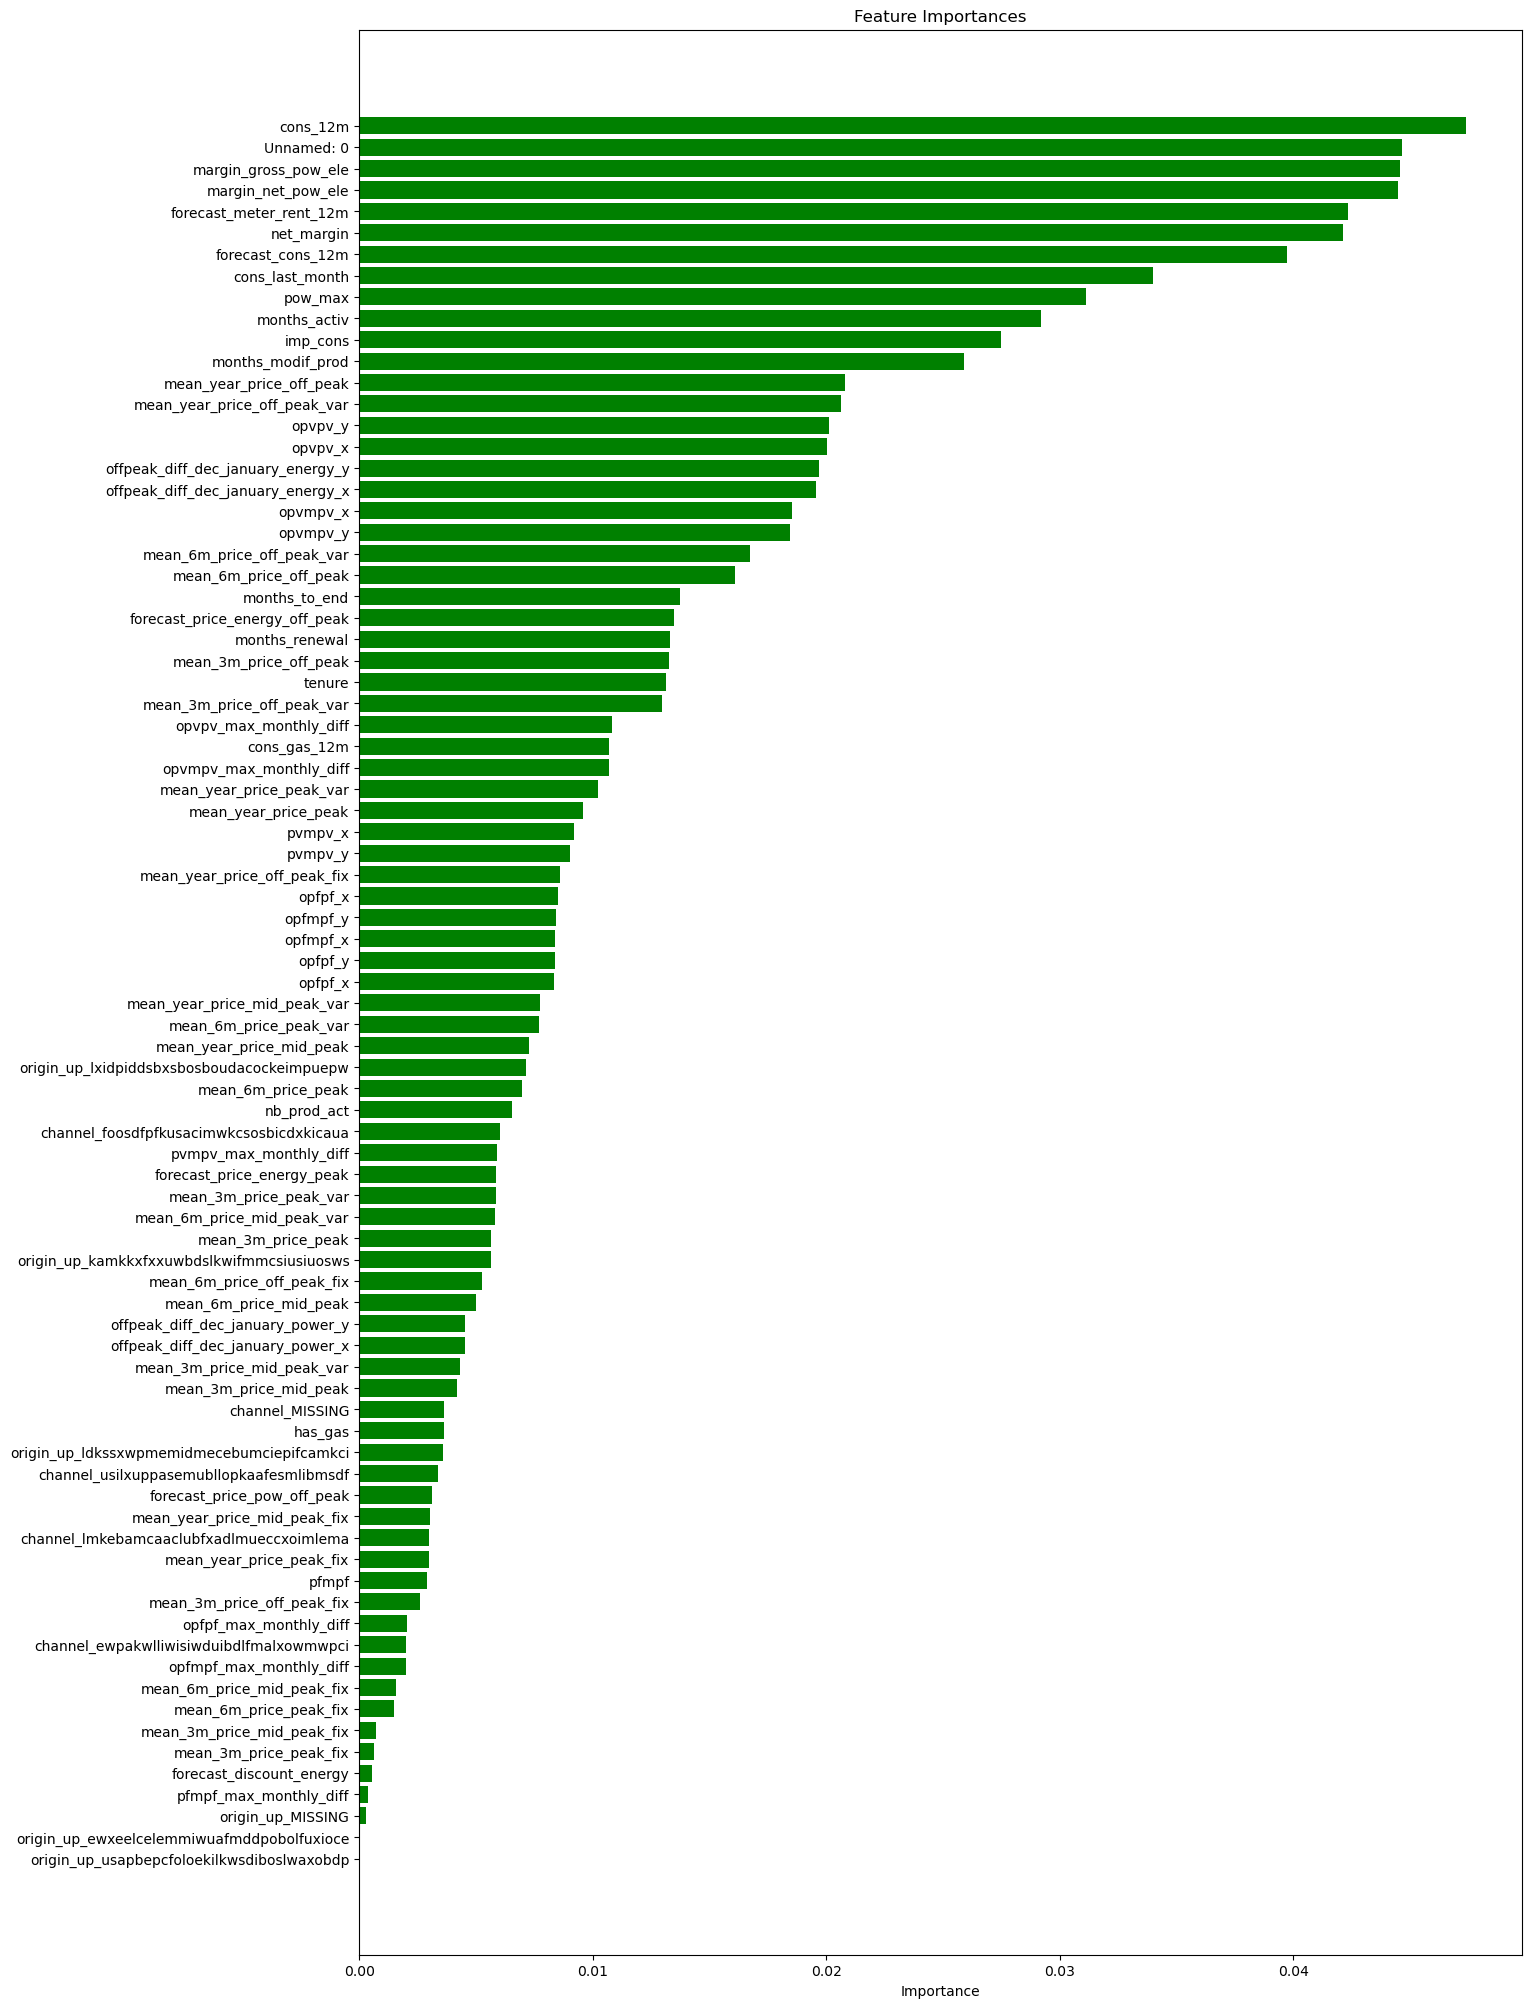

In [110]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='g', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

Based on the feature importance chart, several key observations can be made:

1- Net margin on power subscription and consumption over 12 months: This feature is identified as a top driver for churn in the model. Customers with lower net margins may be more likely to churn, indicating that the financial aspect of their power subscription and consumption plays a significant role in their decision-making.

2- Forecasted bill of meter rental for the next 2 months: The forecasted bill of meter rental is also identified as an influential driver of churn. Higher forecasted bills may contribute to customer dissatisfaction and increase the likelihood of churn.

3- Time-related features: Time-related features, such as the number of months active, tenure, and the number of months since the last contract update, have notable influence on churn. These findings suggest that customer behavior and engagement over time are important factors in predicting churn.

4- Feature recommendation impact: The recommended feature mentioned by a colleague is found to be influential, although it may not be the top driver. Additionally, some features derived from this recommendation perform even better, indicating that further feature engineering can enhance the model's predictive power.

5- Price sensitivity features: The chart suggests that price sensitivity features have varying levels of importance, but they are not the primary drivers of churn. Other factors, such as net margin and time-related features, appear to have a stronger influence on customer churn.

Overall, the feature importance analysis provides valuable insights into the factors driving churn in the model. It highlights the significance of net margin, forecasted bills, time-related features, and the impact of different features on churn prediction. These observations can guide further analysis and decision-making for customer retention strategie

In [111]:
proba_predictions = rf_classifier.predict_proba(X_test)
probabilities = proba_predictions[:, 1]

(understand)
proba_predictions = rf_classifier.predict_proba(X_test): This line predicts the class probabilities for each sample in the test data using the predict_proba() method of the Random Forest classifier. It returns an array of shape (n_samples, n_classes), where n_samples is the number of samples in the test data and n_classes is the number of classes (2 in this binary classification case).

probabilities = proba_predictions[:, 1]: This line extracts the predicted probabilities of the positive class (churn) by indexing the second column ([:, 1]) of the proba_predictions array. The second column corresponds to the probabilities of the positive class, while the first column ([:, 0]) would correspond to the probabilities of the negative class (non-churn).

In [112]:
X_test = X_test.reset_index()
X_test.drop(columns='index', inplace=True)

In [113]:
X_test['churn'] = y_pred.tolist()
X_test['churn_probability'] = probabilities.tolist()
X_test.to_csv('predicted_data.csv')

# Business impact of discount

In [114]:
test_data = pd.read_csv('predicted_data.csv')
test_data.drop(test_data.columns[0], axis=1, inplace=True)
test_data.head()

Unnamed: 0  cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0        4947  0.826439      0.000000         0.757030           0.000000   
1        5868  0.845138      0.792645         0.781810           0.581942   
2        6805  0.000000      0.000000         0.000000           0.000000   
3        1323  0.727983      0.000000         0.000000           0.654820   
4       11759  0.623450      0.000000         0.542116           0.546926   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                 0.500558   
1                       0.0                 0.364021   
2                       0.0                 0.494958   
3                       0.0                 0.362656   
4                       0.0                 0.349966   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.120372                    0.103487   
1                        0.144902                    0.000000   
2                        0.092453                    0.086393   
3                        0.142996                    0.000000   
4                        0.141434                    0.000000   

   forecast_price_pow_off_peak  ...  channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                    40.606701  ...                                         0   
1                    44.311378  ...                                         1   
2                    59.173468  ...                                         0   
3                    44.311378  ...                                         0   
4                    44.311378  ...                                         0   

   channel_usilxuppasemubllopkaafesmlibmsdf  origin_up_MISSING  \
0                                         0                  0   
1                                         0                  0   
2                                         0                  0   
3                                         0                  0   
4                                         0                  0   

   origin_up_ewxeelcelemmiwuafmddpobolfuxioce  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                           0   
1                                           1   
2                                           1   
3                                           0   
4                                           0   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  \
0                                           1   
1                                           0   
2                                           0   
3                                           1   
4                                           1   

   origin_up_usapbepcfoloekilkwsdiboslwaxobdp  churn  churn_probability  
0                                           0      0              0.482  
1                                           0      0              0.156  
2                                           0      0              0.004  
3                                           0      0              0.170  
4                                           0      0              0.180  

[5 rows x 84 columns]

To calculate the baseline revenue estimate (basecase_revenue) for each customer for the next twelve months, you can follow these steps:

For each customer, multiply their forecasted consumption (in kWh) for each month by the corresponding forecasted price (in currency/unit) for that month. Sum up the revenue for all twelve months to obtain the baseline estimate of electricity revenue for the customer.

For customers who churned during the period between January 2016 and the start of March 2016, reduce the forecasted revenue calculation by 91.9% to account for the lost revenue. This assumes that the churn could have occurred at any time between January 2016 and the end of February 2016. You can calculate this adjusted revenue using the formula:

basecase_revenue_after_churn = basecase_revenue * (1 - 0.919)

This adjustment accounts for the average lost revenue assuming churn occurred evenly throughout the period between January and the end of February.

By performing these calculations, you can obtain the baseline revenue estimate (basecase_revenue) for all customers and the adjusted revenue after churn (basecase_revenue_after_churn) for customers who churned during the specified period.

In [115]:
# Electricity revenue for each customer consists of energy consumption (amount * price) and the meter rent
# (the power price may also play a role, but we will ignore it for now since we need to ask the client for more data)
# Note that we need to reverse the log10-transformation from the data cleaning step

test_data['basecase_revenue'] = (np.power(10, test_data['forecast_cons_12m']) + 1) * test_data['forecast_price_energy_off_peak'] + test_data['forecast_meter_rent_12m']

# Taking churn into account
test_data['basecase_revenue_after_churn'] = test_data['basecase_revenue'] * (1 - 0.919 * test_data['churn'])

In [116]:
test_data.head()


Unnamed: 0  cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0        4947  0.826439      0.000000         0.757030           0.000000   
1        5868  0.845138      0.792645         0.781810           0.581942   
2        6805  0.000000      0.000000         0.000000           0.000000   
3        1323  0.727983      0.000000         0.000000           0.654820   
4       11759  0.623450      0.000000         0.542116           0.546926   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                 0.500558   
1                       0.0                 0.364021   
2                       0.0                 0.494958   
3                       0.0                 0.362656   
4                       0.0                 0.349966   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.120372                    0.103487   
1                        0.144902                    0.000000   
2                        0.092453                    0.086393   
3                        0.142996                    0.000000   
4                        0.141434                    0.000000   

   forecast_price_pow_off_peak  ...  origin_up_MISSING  \
0                    40.606701  ...                  0   
1                    44.311378  ...                  0   
2                    59.173468  ...                  0   
3                    44.311378  ...                  0   
4                    44.311378  ...                  0   

   origin_up_ewxeelcelemmiwuafmddpobolfuxioce  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                           0   
1                                           1   
2                                           1   
3                                           0   
4                                           0   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  \
0                                           1   
1                                           0   
2                                           0   
3                                           1   
4                                           1   

   origin_up_usapbepcfoloekilkwsdiboslwaxobdp  churn  churn_probability  \
0                                           0      0              0.482   
1                                           0      0              0.156   
2                                           0      0              0.004   
3                                           0      0              0.170   
4                                           0      0              0.180   

   basecase_revenue  basecase_revenue_after_churn  
0          0.741302                      0.741302  
1          1.062294                      1.062294  
2          0.679864                      0.679864  
3          1.151521                      1.151521  
4          0.989688                      0.989688  

[5 rows x 86 columns]

To calculate the estimated benefits and costs of intervention, follow these steps:

1- Choose a cut-off probability (e.g., 0.5) to determine which customers will receive a discount based on their churn probability.

2- Customers with a churn probability higher than the cut-off will receive a discount, while customers below the cut-off will not receive a discount.

3- Calculate the revenue of the intervention scenario based on the assumptions:

4- Assume all customers offered a discount accept it.
Customers who receive a discount are assumed not to churn in the next twelve months (churn probability = 0). Their retained revenue is 0.8 * basecase_revenue, where basecase_revenue is the baseline revenue estimate.
Customers who do not receive a discount are assumed to churn based on the observed dependent variable (0 or 1 indicating churn or no churn).
5- Map out the revenue delta as a function of the cut-off probability in a graph. Vary the cut-off probability and calculate the corresponding revenue difference between the intervention scenario and the no-discount scenario.

6- Determine the cut-off probability that approximately optimizes the revenue outcome by finding the balance between the benefits of true positives (retained revenue) and the costs of false positives (reduced revenue from discounts given to customers who wouldn't actually churn).



In [117]:
def get_rev_delta(pred: pd.DataFrame, cutoff: float=0.5, discount: float=0.2) -> float:
    """
    Get the delta of revenues for offering discount for all customers with predicted churn risk >= cutoff
    """
    pred['discount_revenue'] = pred['basecase_revenue_after_churn']
    # Churn predicted => discount is given => customer stays for full year, independent of whether the prediction
    # (false positive, "free"/unnecessary discount given) or correct
    pred.loc[pred['churn_probability'] >= cutoff, 'discount_revenue'] = pred['basecase_revenue'] * (1 - discount)
    # Save the revenue delta for each customer in a separate column
    pred['revenue_delta'] = pred['discount_revenue'] - pred['basecase_revenue_after_churn']
    return pred['revenue_delta'].sum()

Input:

pred: This is a DataFrame that contains predictions for each customer, including columns such as 'basecase_revenue' and 'basecase_revenue_after_churn', which represent the baseline revenue estimate and adjusted revenue after churn, respectively.
cutoff: This parameter specifies the cutoff probability. Customers with a churn probability higher than or equal to this cutoff will be eligible for a discount.
discount: This parameter determines the discount fraction given to customers who qualify for a discount. By default, it is set to 0.2 or 20% discount.
Function Steps:

The function begins by creating a new column in the pred DataFrame called 'discount_revenue' and initializes it with the values from the 'basecase_revenue_after_churn' column. This column will store the revenue for customers after applying the discount.

Next, the function identifies customers whose churn probability is greater than or equal to the specified cutoff. For these customers, their 'discount_revenue' is updated to reflect the discounted revenue. It calculates the discounted revenue by multiplying the 'basecase_revenue' by (1 - discount), which represents the retained revenue after applying the discount.

The function then computes the revenue delta for each customer by subtracting the 'basecase_revenue_after_churn' from the 'discount_revenue'. The revenue delta indicates the difference in revenue between the baseline scenario (no discount) and the intervention scenario (offering a discount).

Finally, the function returns the sum of all the revenue deltas, providing the total revenue delta for offering discounts to customers above the cutoff. This represents the estimated impact of the discount intervention on revenue.

By using this function, you can calculate the revenue delta and assess the financial implications of offering discounts to customers based on their predicted churn risk. It helps you evaluate the effectiveness of the discount strategy and determine the potential revenue outcomes at different cutoff probabilities.

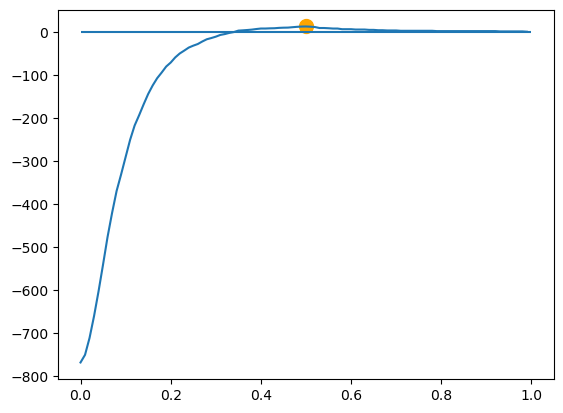

Maximum benefit at cutoff 0.5 with revenue delta of $12.20


In [118]:
# Generate a list of possible cutoffs and the corresponding overall revenue deltas
rev_deltas = pd.Series({cutoff: get_rev_delta(test_data, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.01)})

def plot_tradeoff(rev_deltas: pd.Series):
    # Plot the revenue deltas
    rev_deltas.plot()
    # Mark optimal point
    max_pred = rev_deltas.idxmax()
    plt.scatter(max_pred, rev_deltas.loc[max_pred], s=100, c='orange')
    # Reference line for break-even
    plt.hlines(0, 0, 1)
    plt.show()
    print(f'Maximum benefit at cutoff {max_pred} with revenue delta of ${rev_deltas.loc[max_pred]:,.2f}')

plot_tradeoff(rev_deltas)